In [4]:
from tools.LOF import LOF

lof_scores = []
lof_y = []
for feature, param in [('all',0.5), ('real', 0.5), ('reactive', 0.5), ('harmonic', 0.5)]:
    lof = LOF(feature=feature, suppress_progress=False)
    lof.k = param
    anomaly_score, y = lof.cluster_all()

    lof_scores.append(anomaly_score)
    lof_y.append(y)
    
    sc = round(lof.auc_score(anomaly_score, y), 3)
    print(sc)

0% complete
10% complete
20% complete
30% complete
40% complete
50% complete
60% complete
70% complete
80% complete
90% complete
100% complete
0.986
0% complete
10% complete
20% complete
30% complete
40% complete
50% complete
60% complete
70% complete
80% complete
90% complete
100% complete
0.982
0% complete
10% complete
20% complete
30% complete
40% complete
50% complete
60% complete
70% complete
80% complete
90% complete
100% complete
0.978
0% complete
10% complete
20% complete
30% complete
40% complete
50% complete
60% complete
70% complete
80% complete
90% complete
100% complete
0.983


In [2]:
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

Text(165.16666666666669, 0.5, 'True Positive Rate')

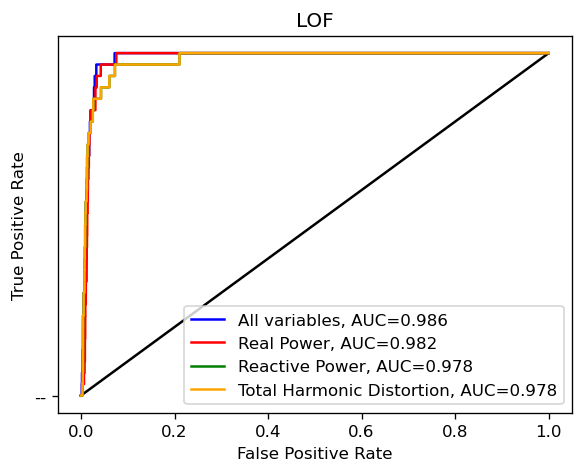

In [13]:
plt.figure(figsize=(14, 7), dpi=120)


plt.subplot(2, 3, 1)
plt.tight_layout()

no_skill = np.arange(0.0, 1.0, 1/1000)
plt.plot(no_skill, no_skill, 'black', '--')

y_true = np.array(lof_y[0])
y_probas = np.array(lof_scores[0])
fpr, tpr, _ = metrics.roc_curve(y_true,  y_probas)
auc = round(metrics.roc_auc_score(y_true, y_probas), 3)
plt.plot(fpr, tpr, 'blue', label="All variables, AUC="+str(auc))

y_true = np.array(lof_y[1])
y_probas = np.array(lof_scores[1])
fpr, tpr, _ = metrics.roc_curve(y_true,  y_probas)
auc = round(metrics.roc_auc_score(y_true, y_probas), 3)
plt.plot(fpr, tpr, 'red', label="Real Power, AUC="+str(auc))

y_true = np.array(lof_y[2])
y_probas = np.array(lof_scores[2])
fpr, tpr, _ = metrics.roc_curve(y_true,  y_probas)
auc = round(metrics.roc_auc_score(y_true, y_probas), 3)
plt.plot(fpr, tpr, 'green', label="Reactive Power, AUC="+str(auc))

y_true = np.array(lof_y[2])
y_probas = np.array(lof_scores[2])
fpr, tpr, _ = metrics.roc_curve(y_true,  y_probas)
auc = round(metrics.roc_auc_score(y_true, y_probas), 3)
plt.plot(fpr, tpr, 'orange', label="Total Harmonic Distortion, AUC="+str(auc))


plt.legend(loc = 'best')
plt.title("LOF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



